In [6]:
import pandas as pd
import sklearn
import numpy as np

from typing import Literal

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'  # For high-DPI displays


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from utils.DatasetInfo import DatasetInfo
from utils.Metrics import Metrics
from utils.ExperimentInfo import ExperimentInfo

## Используемые модели:
- логрегрессия
- наивный байес
- решающее дерево
- случайный лес/беггинг/бустинг
- support vector classification с разными ядрами

- семплирование распределений(from sklearn.mixture import GaussianMixture, from sklearn.neighbors import KernelDensity, kde = KernelDensity(kernel='gaussian').fit(data))

## To do:
- PCA 
- построить зависимость метрик от трешхолда
- сохранить параметры препроцессинга чтобы их потом применить к тестовому датасету
- construct a method to plot mupltiple aucs from multiple models
- thresholding of probabilities to maximise metric 

In [12]:
task_8 = DatasetInfo(8)

Dataset num: 8
Total number of samples = 1000, features = 1500
Train/test split ratio 0.8/0.2
Positive class ratio: 0.202



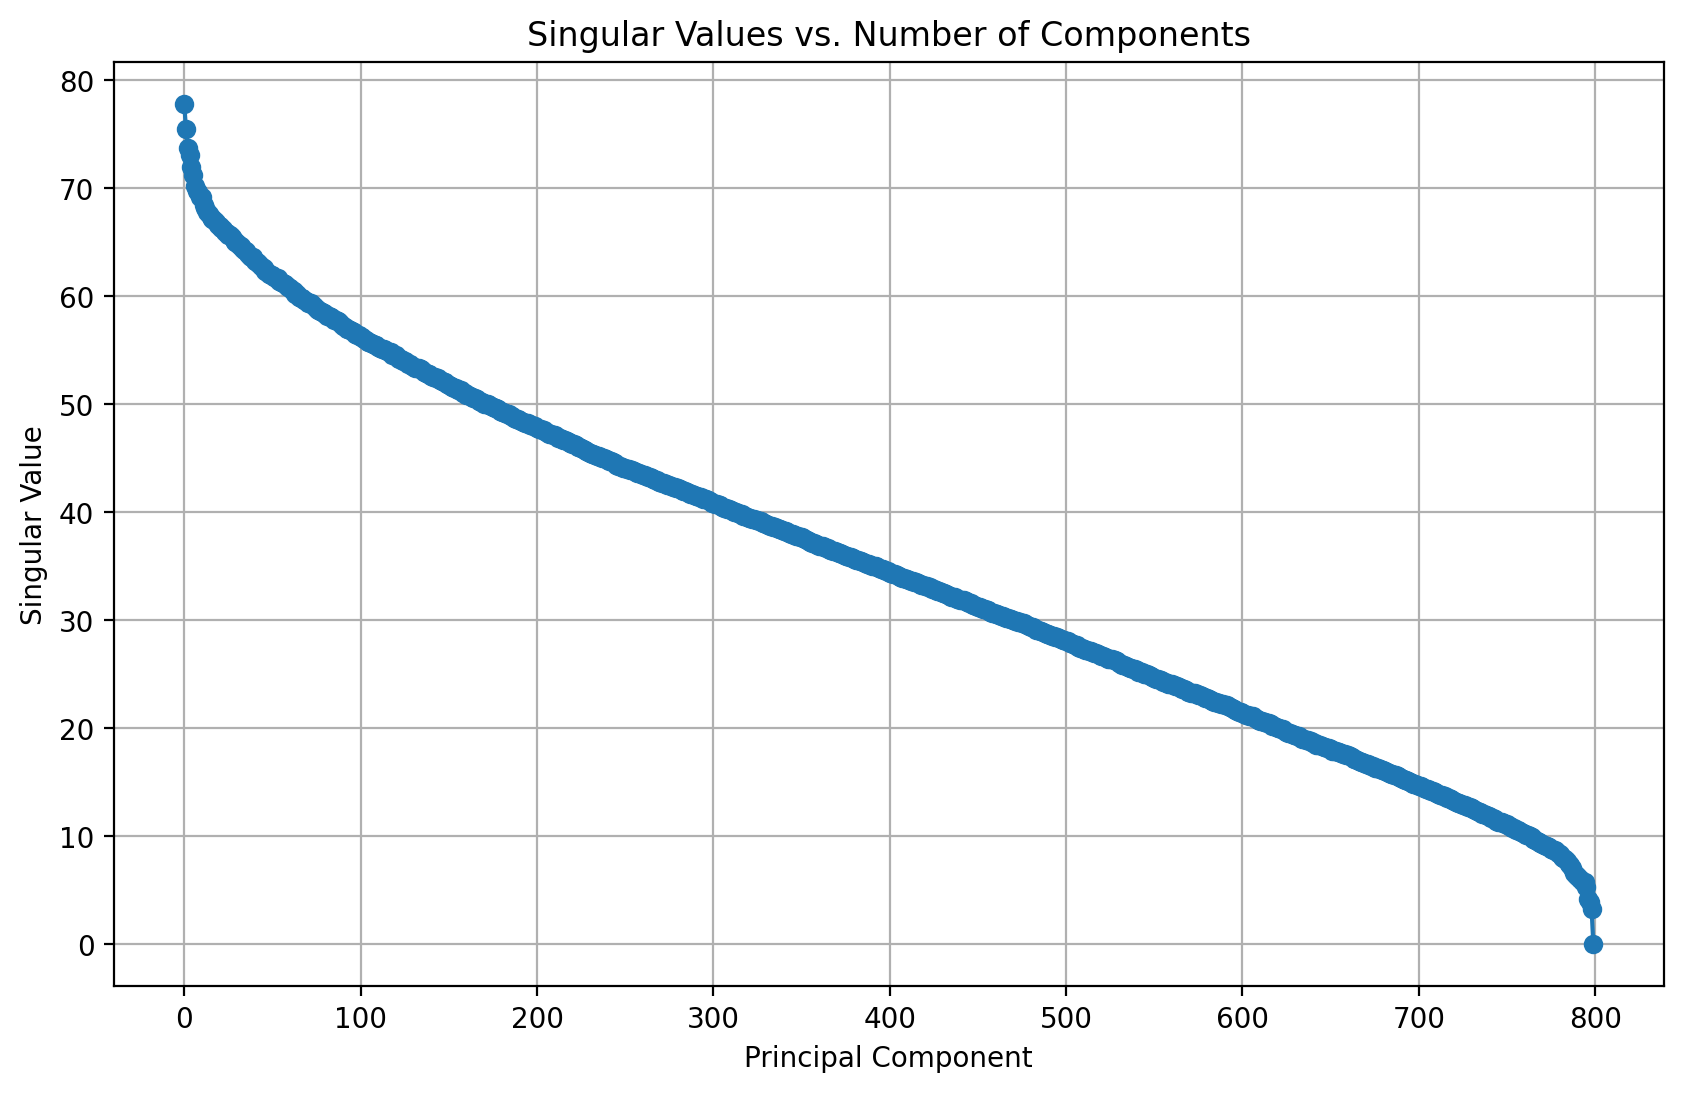

In [13]:
task_8.plot_singular_values()

In [168]:
models = {
    'GaussianNB': {'model': GaussianNB(), 'description': None},
    'LogisticRegression': {'model': LogisticRegression(), 'description': None},
    'DecisionTree': {'model': DecisionTreeClassifier(), 'description': None},
    'RandomForest': {'model': RandomForestClassifier(), 'description': None},
    'Bagging': {'model': BaggingClassifier(), 'description': None},
    'GradientBoosting': {'model': GradientBoostingClassifier(), 'description': None},
    'SVC_linear': {'model': SVC(kernel='linear', probability=True), 'description': 'SVC with linear kernel'},
    'SVC_rbf': {'model': SVC(kernel='rbf', probability=True), 'description': 'SVC with rbf kernel'},
    'SVC_poly': {'model': SVC(kernel='poly', probability=True), 'description': 'SVC with poly kernel'},
    'SVC_sigmoid': {'model': SVC(kernel='sigmoid', probability=True), 'description': 'SVC with sigmoid kernel'}
}

#     'GaussianMixture': {'model': GaussianMixture(), 'description': None},

In [216]:
experiment = ExperimentInfo(task_5, models)

In [217]:
experiment.fit()

Fitting GaussianNB
Fitting LogisticRegression
Fitting DecisionTree
Fitting RandomForest
Fitting Bagging
Fitting GradientBoosting
Fitting SVC_linear
Fitting SVC_rbf
Fitting SVC_poly
Fitting SVC_sigmoid


In [218]:
experiment.evaluate()

Evaluating GaussianNB
Evaluating LogisticRegression
Evaluating DecisionTree
Evaluating RandomForest
Evaluating Bagging
Evaluating GradientBoosting
Evaluating SVC_linear
Evaluating SVC_rbf
Evaluating SVC_poly
Evaluating SVC_sigmoid


In [219]:
experiment.drop_bad_models()

In [220]:
experiment.best_model()

In [221]:
print(experiment)

Dataset num: 5
Total number of samples = 1000, features = 5000
Train/test split ratio 0.8/0.2
Positive class ratio: 0.373
AUC = 0.9419733333333333, model = GradientBoosting
NUM = 0.9419733333333333, model = GradientBoosting
ASY1 = 0.6190933333333333, model = RandomForest
ASY2 = 0.9419733333333333, model = GradientBoosting
Definetly worse models: 
[]


In [222]:
def save_best_model(self):
    tmp_dict = {}
    for metric in ['NUM', 'ASY1', 'ASY2']:
        tmp_dict[metric] = self.models[self.best_models[metric]]['model'].predict(self.dataset.X_predict)
    tmp_dict['AUC'] = self.models[self.best_models[metric]]['model'].predict_proba(self.dataset.X_predict)[:, 1]
    df = pd.DataFrame(tmp_dict)
    df.to_csv(f'results/task1_{self.dataset.num_of_dataset}_ans.csv', index=False)

In [223]:
save_best_model(experiment)